# Import libraries

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import data

In [6]:
path = r'/Users/zoegyftopoulos/Documents/Data Projects/07-2024 Instacart Basket Analysis'

In [8]:
df_instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'orders_products_customers.pkl'))

In [7]:
df_instacart.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_time', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_days_betw_orders',
       'order_frequency_flag', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

In [8]:
# Drop columns with personally identifiable information
df = df_instacart.drop(columns = ['first_name', 'surname'])

In [9]:
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_time', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_days_betw_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

## Comparing customer behavior in different geographic areas

### Create a regional segmentation

In [12]:
# Create lists to organize states by region
northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont' ]

In [13]:
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [14]:
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [15]:
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [16]:
# Use loc() function to create a new region column assigning states to regions
df.loc[df['state'].isin(northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(midwest), 'region'] = 'Midwest' 
df.loc[df['state'].isin(south), 'region'] = 'South'
df.loc[df['state'].isin(west), 'region'] = 'West'

In [17]:
len(df['region'])

32434212

In [18]:
len(df)

32434212

In [19]:
df['region'].value_counts(dropna = False)

region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

### Determine whether there’s a difference in spending habits between the different U.S. regions

In [21]:
region_spending = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [22]:
region_spending

spending_flag,High spender,Low spender
region,,
Midwest,156129,7447681
Northeast,108343,5620004
South,210182,10591428
West,160807,8139638


## Create an exclusion flag for low-activity customers

### Create an exclusion flag for customers with less than 5 orders

In [25]:
# Use loc() function to exclude/include flags
df.loc[df['max_order'] < 5, 'exclusion_flag'] = 'exclude'
df.loc[df['max_order'] >= 5, 'exclusion_flag'] = 'include'

In [26]:
len(df['exclusion_flag'])

32434212

In [27]:
df['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
include    30992664
exclude     1441548
Name: count, dtype: int64

In [28]:
max_ord_exc = pd.crosstab(df['exclusion_flag'], df['max_order'], dropna = False)

In [29]:
max_ord_exc

max_order,3,4,5,6,7,8,9,10,11,12,...,90,91,92,93,94,95,96,97,98,99
exclusion_flag,,,,,,,,,,,,,,,,,,,,,
exclude,687288,754260,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
include,0,0,793833,812032,804712,812641,810819,773813,770222,745122,...,48397,59401,55188,50439,52635,59894,40469,44969,44604,1172222


In [30]:
# Exclude customers with less than 5 orders
df_exc = df[df['exclusion_flag'] == 'include']

In [31]:
df_exc.shape

(30992664, 34)

In [32]:
df_exc.to_pickle(os.path.join(path, '02 Data', 'Prepared data', 'ord_prods_cust_exc.pkl'))

## Customer profiling

### Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

In [35]:
df_exc.describe()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price,median_days_betw_orders,age,n_dependants,income
count,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,2.932978e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07
mean,1.710321e+06,1.029285e+05,1.783372e+01,2.741342e+00,1.341082e+01,1.081040e+01,2.557757e+04,8.361651e+00,6.062036e-01,7.120896e+01,9.924801e+00,1.193448e+01,3.442563e+01,1.193448e+01,9.957273e+00,4.946793e+01,1.501798e+00,9.967322e+04
std,9.873797e+05,5.947097e+04,1.763399e+01,2.089226e+00,4.248811e+00,8.578482e+00,1.409313e+04,7.135006e+00,4.885906e-01,3.821479e+01,6.282146e+00,4.911216e+02,2.489426e+01,7.987316e+01,6.665491e+00,1.848520e+01,1.118902e+00,4.313928e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.554110e+05,5.140900e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.353500e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.398110e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.728900e+04
50%,1.710404e+06,1.025850e+05,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.829827e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.565216e+06,1.543880e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.793100e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.253606e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.281010e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


### Age groups

In [37]:
# Create an age profiling variable
df_exc.loc[(df_exc['age'] >= 18) & (df_exc['age'] < 40), 'age_group'] = 'Young adult'
df_exc.loc[(df_exc['age'] >= 40) & (df_exc['age'] < 60), 'age_group'] = 'Middle-aged adult'
df_exc.loc[df_exc['age'] >= 60, 'age_group'] = 'Old adult'

/var/folders/pq/70k0jkkj1nb0h6hnws7mj8540000gn/T/ipykernel_12182/220913966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exc.loc[(df_exc['age'] >= 18) & (df_exc['age'] < 40), 'age_group'] = 'Young adult'


In [38]:
len(df_exc['age_group'])

30992664

In [39]:
df_exc['age_group'].value_counts(dropna = False)

age_group
Young adult          10674650
Old adult            10583941
Middle-aged adult     9734073
Name: count, dtype: int64

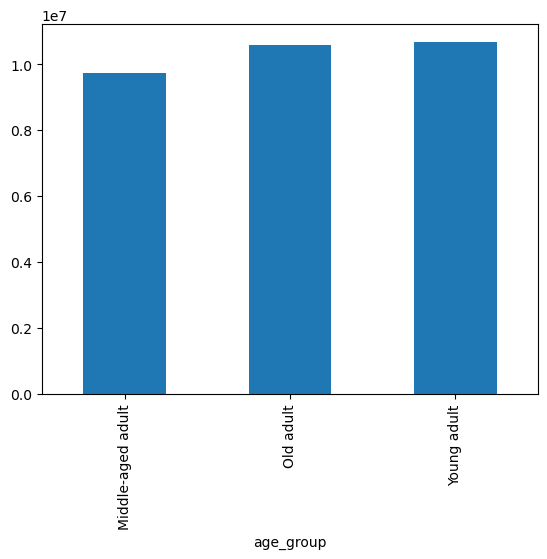

In [40]:
 # Create a bar chart
bar_age_groups = df_exc['age_group'].value_counts().sort_index().plot.bar()

In [2]:
# Export bar chart
bar_age_groups.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_age_groups.png'), bbox_inches = 'tight')

NameError: name 'bar_age_groups' is not defined

In [42]:
# Aggregate the max, mean, and min variables on the age group level for usage frequency
df_exc.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                    mean  min   max
age_group                                          
Middle-aged adult              10.819718  0.0  30.0
Old adult                      10.800991  0.0  30.0
Young adult                    10.811221  0.0  30.0

In [43]:
# Aggregate the max, mean, and min variables on age group level for expenditure
df_exc.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                        mean  min      max
age_group                                 
Middle-aged adult  12.027717  1.0  99999.0
Old adult          11.725665  1.0  99999.0
Young adult        12.056513  1.0  99999.0

### Income groups

In [45]:
# Create an income profiling variable
df_exc.loc[df_exc['income'] < 50000, 'income_group'] = 'Low income'
df_exc.loc[(df_exc['income'] >= 50000) & (df_exc['age'] < 100000), 'income_group'] = 'Middle income'
df_exc.loc[df_exc['income'] >= 100000, 'income_group'] = 'High income'

/var/folders/pq/70k0jkkj1nb0h6hnws7mj8540000gn/T/ipykernel_12182/1023026801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exc.loc[df_exc['income'] < 50000, 'income_group'] = 'Low income'


In [46]:
len(df_exc['income_group'])

30992664

In [47]:
df_exc['income_group'].value_counts(dropna = False)

income_group
High income      14219419
Middle income    13407096
Low income        3366149
Name: count, dtype: int64

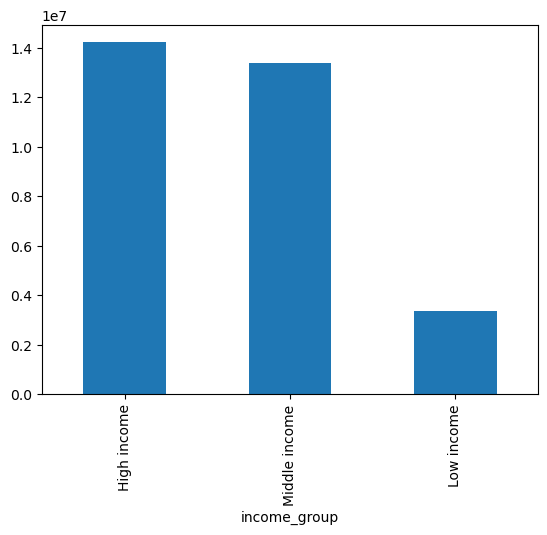

In [48]:
 # Create a bar chart
bar_income_groups = df_exc['income_group'].value_counts().plot.bar()

In [49]:
# Export bar chart
bar_income_groups.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_income_groups.png'), bbox_inches = 'tight')

In [50]:
# Aggregate the max, mean, and min variables on theage group level for usage frequency
df_exc.groupby('income_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                mean  min   max
income_group                                   
High income                10.769923  0.0  30.0
Low income                 11.175710  0.0  30.0
Middle income              10.762065  0.0  30.0

In [51]:
# Aggregate the max, mean, and min variables on age group level for expenditure
df_exc.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                        mean  min      max
age_group                                 
Middle-aged adult  12.027717  1.0  99999.0
Old adult          11.725665  1.0  99999.0
Young adult        12.056513  1.0  99999.0

### Number of dependents

In [53]:
# Create a no. of dependents profiling variable
df_exc.loc[df_exc['n_dependants'] == 0, 'dep_group'] = 'no_dependents'
df_exc.loc[df_exc['n_dependants'] > 0, 'dep_group'] = 'has_dependents'

/var/folders/pq/70k0jkkj1nb0h6hnws7mj8540000gn/T/ipykernel_12182/3027843441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exc.loc[df_exc['n_dependants'] == 0, 'dep_group'] = 'no_dependents'


In [54]:
len(df_exc['dep_group'])

30992664

In [55]:
df_exc['dep_group'].value_counts(dropna = False)

dep_group
has_dependents    23245632
no_dependents      7747032
Name: count, dtype: int64

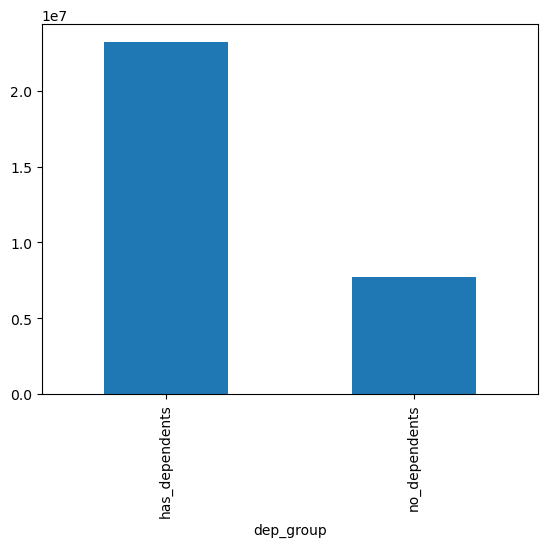

In [56]:
 # Create a bar chart
bar_dep_groups = df_exc['dep_group'].value_counts().plot.bar()

In [57]:
# Export bar chart
bar_dep_groups.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_dependents_groups.png'), bbox_inches = 'tight')

In [58]:
# Aggregate the max, mean, and min variables on theage group level for usage frequency
df_exc.groupby('dep_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                 mean  min   max
dep_group                                       
has_dependents              10.816612  0.0  30.0
no_dependents               10.791750  0.0  30.0

In [59]:
# Aggregate the max, mean, and min variables on age group level for expenditure
df_exc.groupby('dep_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                     mean  min      max
dep_group                              
has_dependents  11.878163  1.0  99999.0
no_dependents   12.103485  1.0  99999.0

## Departments

### Import departments.csv

In [62]:
path = r'/Users/zoegyftopoulos/Documents/Data Projects/07-2024 Instacart Basket Analysis'

In [63]:
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'departments_wrangled.csv'))

In [64]:
df_dep.head(25)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [65]:
df_dep = df_dep.rename(columns = {'Unnamed: 0':'department_id'})

In [66]:
# Create dictionary from df_dep
dep_dict = dict(zip(df_dep['department_id'], df_dep['department']))
dep_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [67]:
# Create new department column for df_exc
df_exc['department'] = df['department_id'].map(dep_dict)

/var/folders/pq/70k0jkkj1nb0h6hnws7mj8540000gn/T/ipykernel_12182/2988893524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exc['department'] = df['department_id'].map(dep_dict)


In [68]:
df_exc.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,...,n_dependants,fam_status,income,_merge,region,exclusion_flag,age_group,income_group,dep_group,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,3,married,40423,both,South,include,Young adult,Low income,has_dependents,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,3,married,40423,both,South,include,Young adult,Low income,has_dependents,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,...,3,married,40423,both,South,include,Young adult,Low income,has_dependents,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,3,married,40423,both,South,include,Young adult,Low income,has_dependents,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,...,3,married,40423,both,South,include,Young adult,Low income,has_dependents,beverages


In [69]:
df_exc['department'].value_counts(dropna = False)

department
produce            9079276
dairy eggs         5191828
snacks             2766406
beverages          2571934
frozen             2123342
pantry             1782903
bakery             1125026
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
breakfast           678095
meat seafood        674785
personal care       424415
babies              410392
international       255991
alcohol             144674
pets                 93065
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

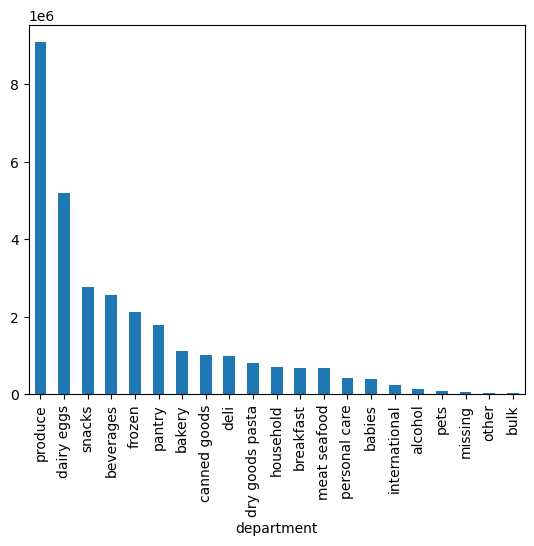

In [70]:
 # Create a bar chart
bar_depart_groups = df_exc['department'].value_counts().plot.bar()

In [71]:
# Export bar chart
bar_depart_groups.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_departments.png'), bbox_inches = 'tight')

In [72]:
# Aggregate the max, mean, and min variables on theage group level for usage frequency
df_exc.groupby('department').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
department                                       
alcohol                      10.007902  0.0  30.0
babies                        9.780844  0.0  30.0
bakery                       10.806458  0.0  30.0
beverages                    10.768491  0.0  30.0
breakfast                    11.003466  0.0  30.0
bulk                          9.880211  0.0  30.0
canned goods                 11.316872  0.0  30.0
dairy eggs                   10.709534  0.0  30.0
deli                         11.051389  0.0  30.0
dry goods pasta              11.440362  0.0  30.0
frozen                       11.414111  0.0  30.0
household                    11.649305  0.0  30.0
international                10.963731  0.0  30.0
meat seafood                 11.123666  0.0  30.0
missing                       9.869551  0.0  30.0
other                        10.624647  0.0  30.0
pantry                       10.836132  0.0  30.0
personal care                11.256465  0.0  30.0
pets                         11.593805  0.0  30.0
produce                      10.574118  0.0  30.0
snacks                       10.671110  0.0  30.0

In [73]:
# Aggregate the max, mean, and min variables on age group level for expenditure
df_exc.groupby('department').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
department                              
alcohol           8.151446  1.0     15.0
babies            7.634399  1.0     15.0
bakery            7.868462  1.0     15.0
beverages         7.682624  1.0     15.0
breakfast         8.068044  1.0     14.9
bulk              8.346919  1.4     14.1
canned goods      7.546660  1.0     15.0
dairy eggs       33.061592  1.0  99999.0
deli              7.783347  1.0     15.0
dry goods pasta   7.349370  1.0     15.0
frozen            7.738627  1.0     15.0
household         7.379943  1.0     15.0
international     7.678797  1.0     15.0
meat seafood     16.300062  8.0     25.0
missing           8.660655  1.0     15.0
other             6.961995  1.1     15.0
pantry            8.014940  1.0     20.0
personal care     7.998617  1.0     15.0
pets              7.887860  1.0     15.0
produce           7.980349  1.0     15.0
snacks            4.275555  1.6      7.0

## Compare customer profiles with regions and departments

### Age by region

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


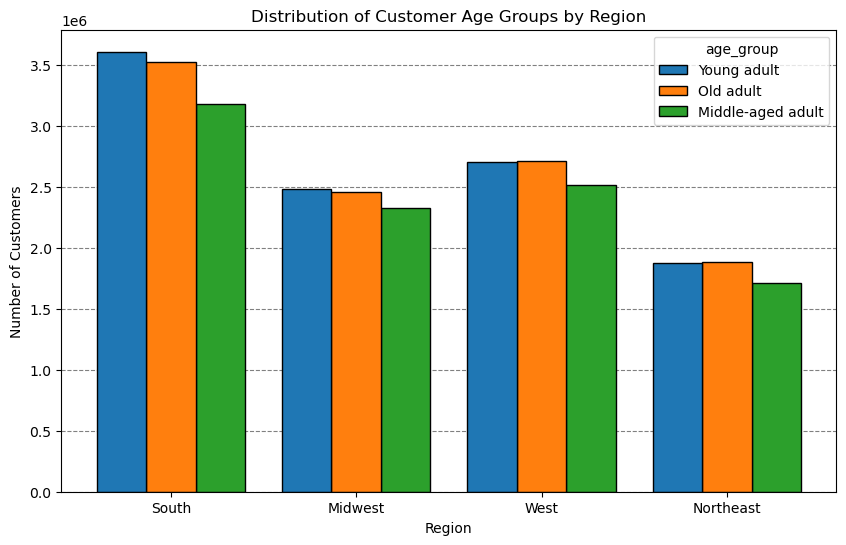

In [149]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df_exc, x = 'region', hue = 'age_group', multiple = 'dodge', shrink = .8, alpha = 1)
plt.gca().set_axisbelow(True)  
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_age_by_region.png'), bbox_inches = 'tight') 
plt.show()

### Income by region

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


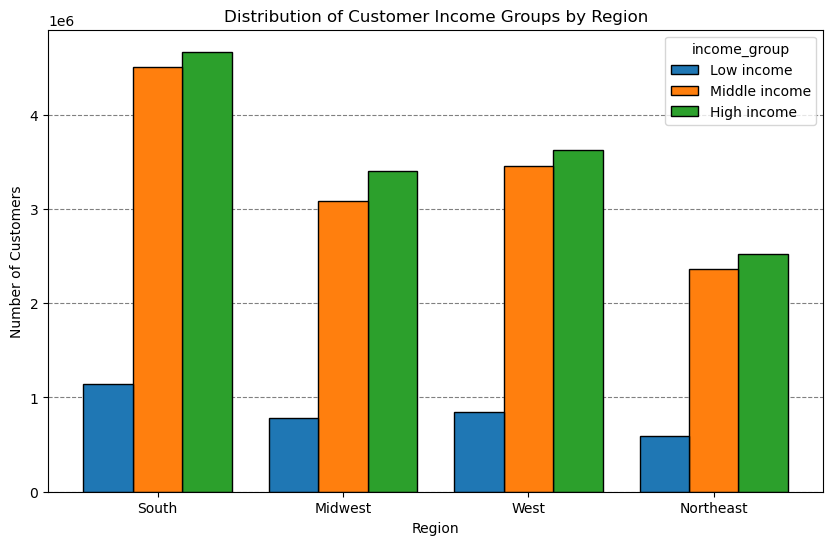

In [151]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df_exc, x = 'region', hue = 'income_group', multiple = 'dodge', shrink = .8, alpha = 1)
plt.gca().set_axisbelow(True)  
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.title('Distribution of Customer Income Groups by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_income_by_region.png'), bbox_inches = 'tight')
plt.show()

### Number of dependents by region

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


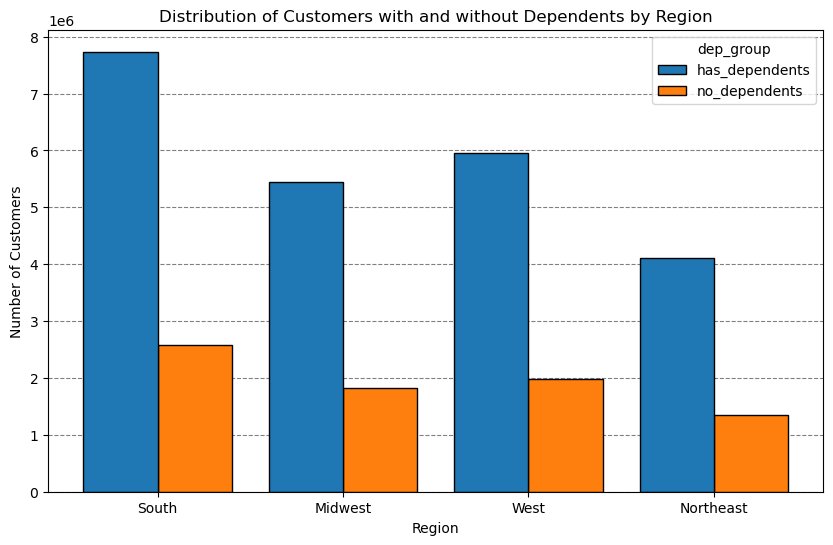

In [155]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df_exc, x = 'region', hue = 'dep_group', multiple = 'dodge', shrink = .8, alpha = 1)
plt.gca().set_axisbelow(True)  
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.title('Distribution of Customers with and without Dependents by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_dependents_by_region.png'), bbox_inches = 'tight')
plt.show()

### Departments by region

In [161]:
dep_region = pd.crosstab(df_exc['department'], df_exc['region'], dropna = False)

In [162]:
dep_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,34052,25034,48822,36766
babies,95741,72712,139511,102428
bakery,262614,200136,373055,289221
beverages,598990,462931,859435,650578
breakfast,157781,119327,225539,175448
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1215821,917293,1727823,1330891
deli,234464,178398,333620,257352


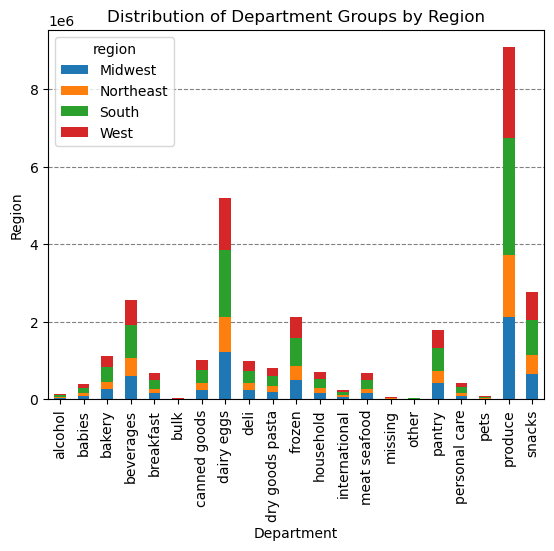

In [169]:
dep_region_bar = dep_region.plot(kind = 'bar', stacked = True)
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.title('Distribution of Department Groups by Region')
plt.ylabel('Region')
plt.xlabel('Department')
dep_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_by_region.png'),bbox_inches='tight') 

### Age by departments

In [167]:
age_department = pd.crosstab(df_exc['age_group'],df_exc['department'],dropna=False)
age_department

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
Middle-aged adult,45382,130198,353973,814071,213440,10403,317911,1625883,314654,258535,...,220117,80697,211531,20482,10689,560661,135802,29388,2846302,867386
Old adult,47630,138738,383651,883680,230205,11424,344447,1767659,343335,280102,...,240636,86448,232753,21787,11604,610017,143775,31757,3104121,940733
Young adult,51662,141456,387402,874183,234450,11624,349716,1798286,345845,283499,...,239105,88846,230501,22499,12118,612225,144838,31920,3128853,958287


<Figure size 2500x2500 with 0 Axes>

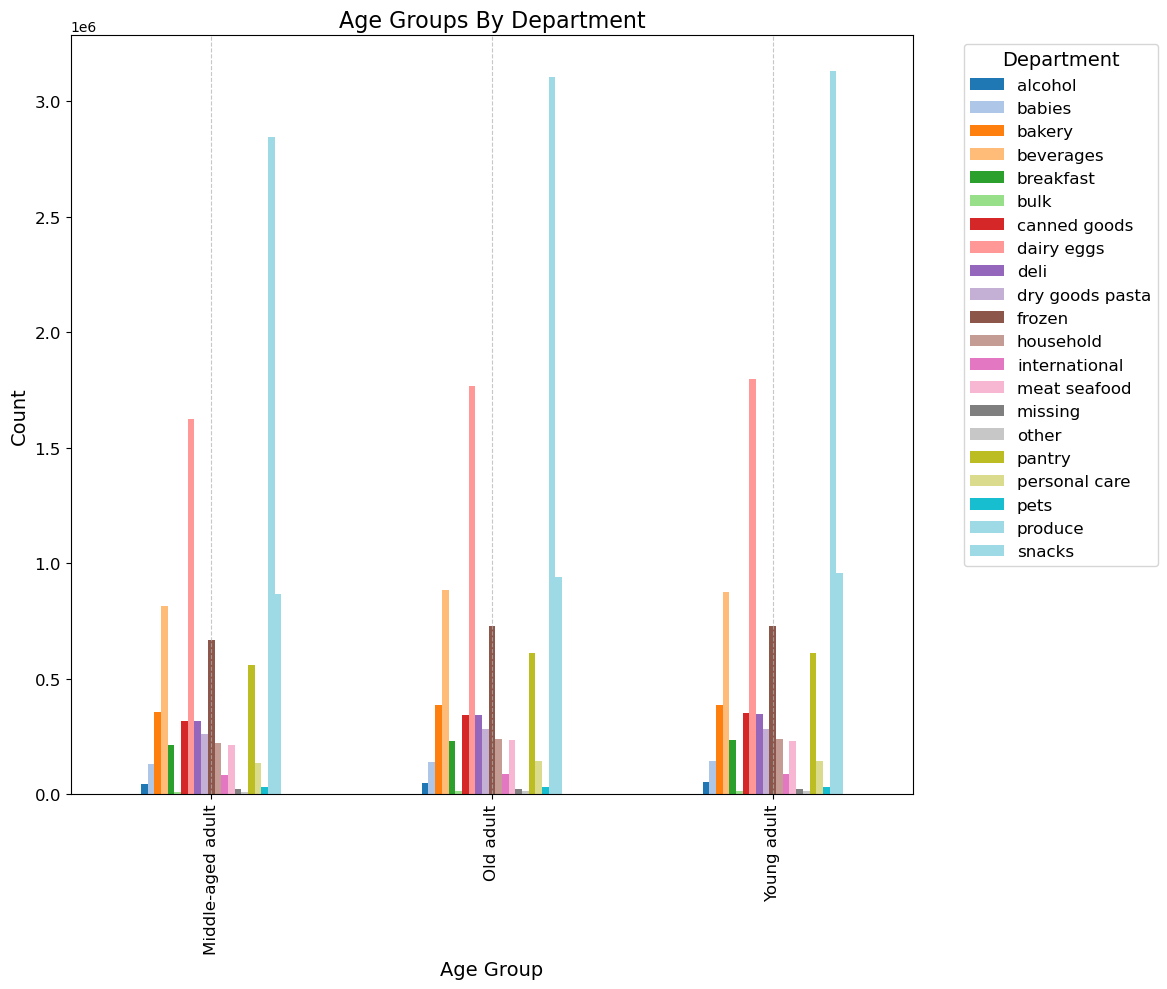

In [181]:
plt.figure(figsize=(25, 25))
age_department_bar = age_department.plot(kind = 'bar', figsize = (14, 10), colormap='tab20')
plt.title('Age Groups By Department', fontsize = 16)
plt.xlabel('Age Group', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title = 'Department', bbox_to_anchor = (1.05, 1), loc = 'upper left', fontsize = 12, title_fontsize = 14)
plt.grid(True, axis = 'x', linestyle = '--', alpha = 0.7)
plt.tight_layout(rect = [0, 0, 0.85, 1])
plt.show()
age_department_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_department_bar.png'))

### Income by departments

In [183]:
income_department = pd.crosstab(df_exc['income_group'],df_exc['department'],dropna=False)
income_department

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
High income,69178,196704,529073,1126477,300675,14218,485253,2412803,462099,392731,...,319960,119991,335553,29455,15750,840027,193475,45090,4237005,1104601
Low income,18050,29240,108186,383123,92308,4676,78975,503429,106448,64481,...,87216,21636,34278,6547,3886,166128,47794,8613,826314,559529
Middle income,57446,184448,487767,1062334,285112,14557,447846,2275596,435287,364924,...,292682,114364,304954,28766,14775,776748,183146,39362,4015957,1102276


<Figure size 1800x1200 with 0 Axes>

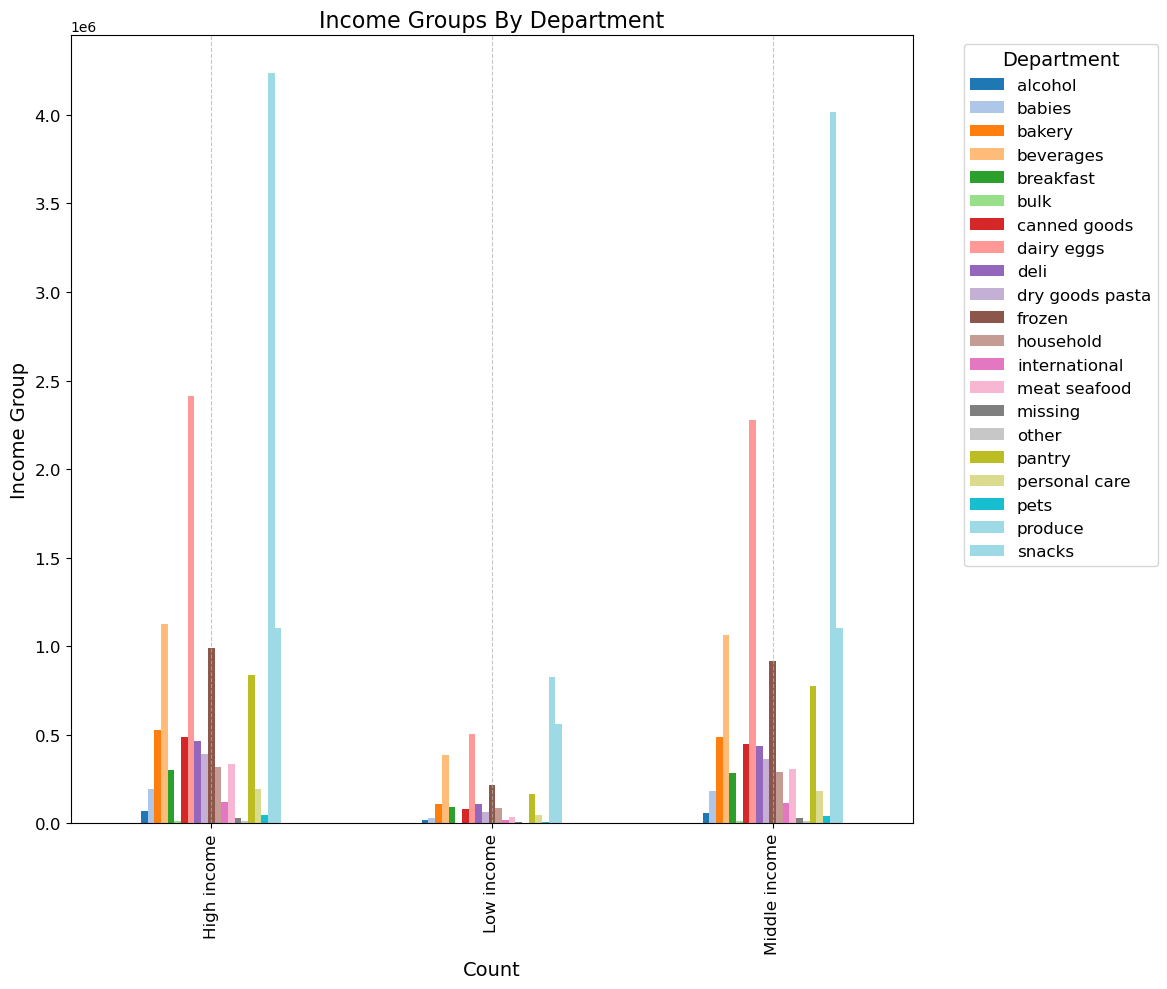

In [185]:
plt.figure(figsize = (18, 12))
income_department_bar = income_department.plot(kind = 'bar', figsize = (14, 10), colormap='tab20')
plt.title('Income Groups By Department', fontsize = 16)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Income Group', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title = 'Department', bbox_to_anchor = (1.05, 1), loc = 'upper left', fontsize = 12, title_fontsize = 14)
plt.grid(True, axis = 'x', linestyle = '--', alpha = 0.7)
plt.tight_layout(rect = [0, 0, 0.85, 1])
plt.show()
income_department_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_department_bar.png'))

### Number of dependents by departments

In [187]:
dependents_department = pd.crosstab(df_exc['dep_group'],df_exc['department'],dropna=False)
dependents_department

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
dep_group,,,,,,,,,,,,,,,,,,,,,
has_dependents,107822,307064,842540,1926585,509770,25451,761054,3893613,750452,617840,...,528500,191530,508906,48833,25697,1338937,318180,69463,6803834,2075968
no_dependents,36852,103328,282486,645349,168325,8000,251020,1298215,253382,204296,...,171358,64461,165879,15935,8714,443966,106235,23602,2275442,690438


<Figure size 1800x1200 with 0 Axes>

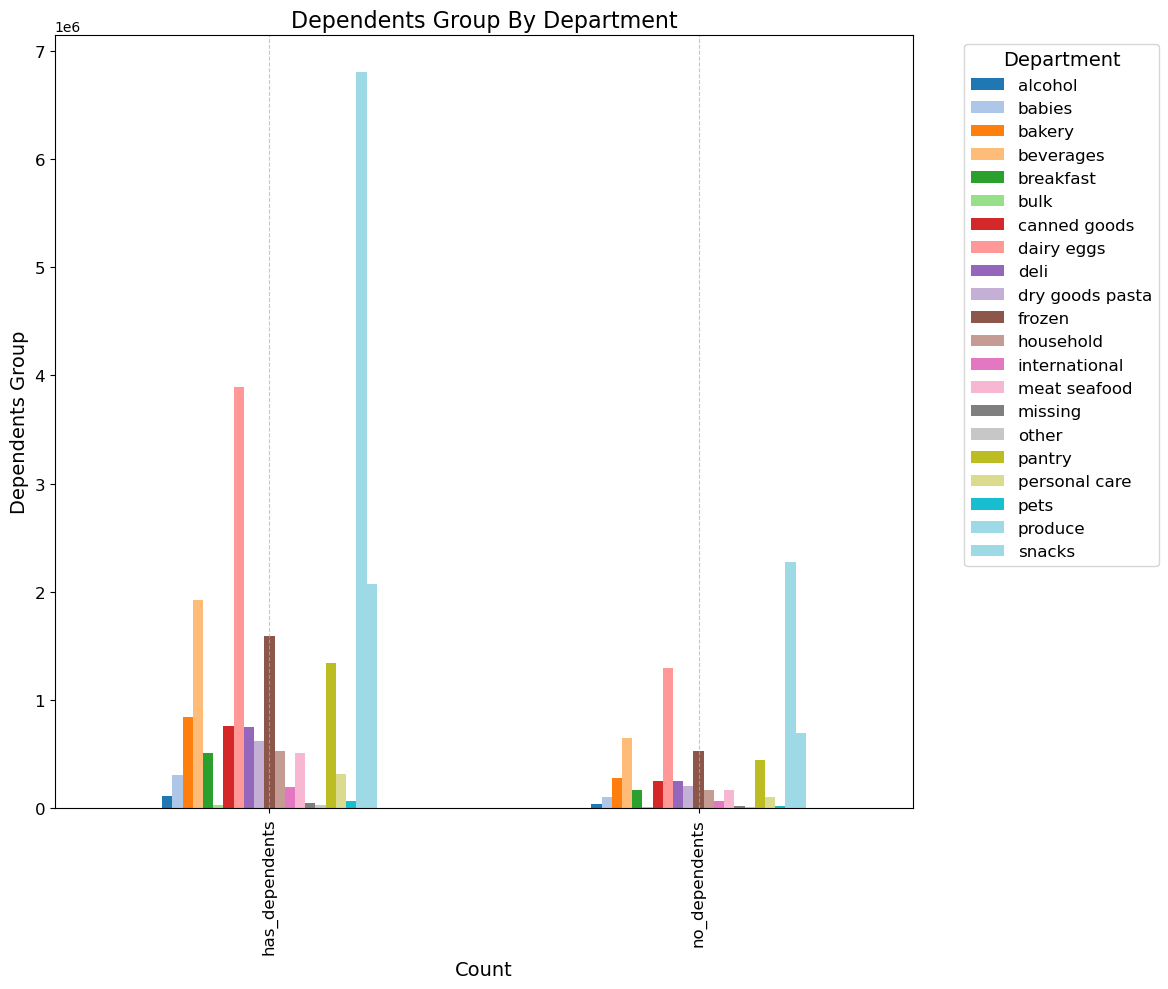

In [189]:
plt.figure(figsize = (18, 12))
dependents_department_bar = dependents_department.plot(kind = 'bar', figsize = (14, 10), colormap='tab20')
plt.title('Dependents Group By Department', fontsize = 16)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Dependents Group', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title = 'Department', bbox_to_anchor = (1.05, 1), loc = 'upper left', fontsize = 12, title_fontsize = 14)
plt.grid(True, axis = 'x', linestyle = '--', alpha = 0.7)
plt.tight_layout(rect = [0, 0, 0.85, 1])
plt.show()
dependents_department_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dependents_department_bar.png'))